In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
import pickle
import pandas as pd

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

In [2]:
data_path = '../data/'
#test = pickle.load( open(data_path + 'test_feature_myadding', 'rb'))
test = pickle.load( open(data_path + 'test_feature_myadding1_reduceDim', 'rb'))
print 'loading done'

loading done


In [3]:
data_path = '../data/'
train = pickle.load( open(data_path + 'train_feature_myadding1_reduceDim', 'rb'))
#train = pickle.load( open(data_path + 'train_feature_myadding', 'rb'))
print 'loading done'

loading done


In [4]:
# train['song_country'] = train['song_country'].astype('category')
# test['song_country'] = test['song_country'].astype('category')
# train['artist_name'] = train['artist_name'].astype('category')
# test['artist_name'] = test['artist_name'].astype('category')
# train['composer'] = train['composer'].astype('category')
# test['composer'] = test['composer'].astype('category')
# train['lyricist'] = train['lyricist'].astype('category')
# test['lyricist'] = test['lyricist'].astype('category')

In [5]:
# train = train.drop(['song_year_x'], axis=1)
# test = test.drop(['song_year_x'], axis=1)

In [6]:
# pickle.dump(train, open(data_path + 'train_feature_myadding1_reduceDim', 'wb'))
# pickle.dump(test, open(data_path + 'test_feature_myadding1_reduceDim', 'wb'))
# print 'loading done'

In [8]:
train['song_year_y'].replace([np.inf, -np.inf], np.nan)
test['song_year_y'].replace([np.inf, -np.inf], np.nan)
print 'done'

done


In [10]:
train = train.dropna(axis=0, how='any')
print len(train)

4184145


In [11]:
# Preprocess dataset
cols = list(train.columns)
cols.remove('target')
for col in cols:
    if train[col].dtype.name == 'category':
        train[col] = train[col].cat.codes
        print(col)

msno
source_system_tab
source_screen_name
source_type
genre_ids
artist_name
composer
lyricist
language
city
gender
registered_via
song_country


In [12]:
print train.dtypes

msno                          int16
song_id                       int64
source_system_tab              int8
source_screen_name             int8
source_type                    int8
target                        uint8
song_length                  uint32
genre_ids                     int16
artist_name                   int16
composer                      int16
lyricist                      int16
language                       int8
city                           int8
bd                            uint8
gender                         int8
registered_via                 int8
expiration_date               int64
registration_year             int64
registration_month            int64
registration_date             int64
expiration_year               int64
expiration_month              int64
membership_days               int64
genre_ids_count                int8
lyricists_count                int8
composer_count                 int8
is_featured                    int8
artist_count                

In [13]:
# train.fillna(-1)
# test.fillna(-1)
# print 'xx'
# print np.any(np.isnan(train))

In [14]:
# train = train.fillna(lambda x: x.median())
# print train.isnull().any()
# print test.isnull().any()
# test = test.fillna(lambda x: x.median())
# print test.isnull().any()

In [15]:
# #print train.dtypes
# train['lyricist'].fillna('no_lyricist',inplace=True)
# # print np.any(np.isnan(train))

In [16]:
print len(train), type(train)
train1 = train.sample(frac=0.4, replace=False)

4184145 <class 'pandas.core.frame.DataFrame'>


In [17]:
print ("Train test and validation sets")
X = np.array(train1.drop(['target'], axis=1))
y = train1['target'].values
print 'done'

Train test and validation sets
done


done
done
Feature ranking:
1. feature 0 (0.168541)
2. feature 12 (0.149557)
3. feature 11 (0.113693)
4. feature 31 (0.066347)
5. feature 14 (0.045468)
6. feature 1 (0.043223)
7. feature 5 (0.043053)
8. feature 4 (0.042272)
9. feature 3 (0.041616)
10. feature 2 (0.036030)
11. feature 32 (0.034552)
12. feature 34 (0.034388)
13. feature 7 (0.026881)
14. feature 8 (0.022600)
15. feature 13 (0.021152)
16. feature 6 (0.020524)
17. feature 9 (0.019388)
18. feature 24 (0.016025)
19. feature 33 (0.014528)
20. feature 23 (0.011909)
21. feature 10 (0.009259)
22. feature 30 (0.007463)
23. feature 22 (0.004556)
24. feature 26 (0.003294)
25. feature 27 (0.001575)
26. feature 29 (0.001187)
27. feature 28 (0.000676)
28. feature 25 (0.000242)
29. feature 21 (0.000000)
30. feature 15 (0.000000)
31. feature 16 (0.000000)
32. feature 18 (0.000000)
33. feature 19 (0.000000)
34. feature 20 (0.000000)
35. feature 17 (0.000000)


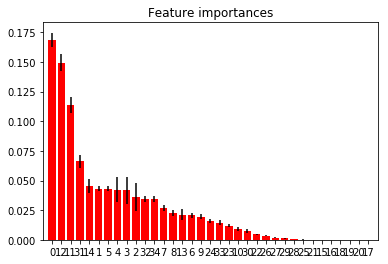

In [18]:
forest.fit(X, y)
importances = forest.feature_importances_
print 'done'
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print 'done'
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [19]:
np.any(np.isnan(train))

False

1. msno (0.168541)
2. song_id (0.149557)
3. source_system_tab (0.113693)
4. source_screen_name (0.066347)
5. source_type (0.045468)
6. target (0.043223)
7. song_length (0.043053)
8. genre_ids (0.042272)
9. artist_name (0.041616)
10. composer (0.036030)
11. lyricist (0.034552)
12. language (0.034388)
13. city (0.026881)
14. bd (0.022600)
15. gender (0.021152)
16. registered_via (0.020524)
17. expiration_date (0.019388)
18. registration_year (0.016025)
19. registration_month (0.014528)
20. registration_date (0.011909)
21. expiration_year (0.009259)
22. expiration_month (0.007463)
23. membership_days (0.004556)
24. genre_ids_count (0.003294)
25. lyricists_count (0.001575)
26. composer_count (0.001187)
27. is_featured (0.000676)
28. artist_count (0.000242)
29. artist_composer (0.000000)
30. artist_composer_lyricist (0.000000)
31. song_lang_boolean (0.000000)
32. smaller_song (0.000000)
33. count_song_played (0.000000)
34. count_artist_played (0.000000)
35. song_country (0.000000)


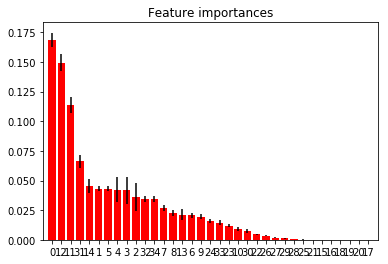

In [30]:
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f+1, train1.columns[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [28]:
print train1.columns[0]

msno


In [ ]:
# 1. msno (0.168541)
# 2. song_id (0.149557)
# 3. source_system_tab (0.113693)
# 4. source_screen_name (0.066347)
# 5. source_type (0.045468)
# 6. target (0.043223)
# 7. song_length (0.043053)
# 8. genre_ids (0.042272)
# 9. artist_name (0.041616)
# 10. composer (0.036030)
# 11. lyricist (0.034552)
# 12. language (0.034388)
# 13. city (0.026881)
# 14. bd (0.022600)
# 15. gender (0.021152)
# 16. registered_via (0.020524)
# 17. expiration_date (0.019388)
# 18. registration_year (0.016025)
# 19. registration_month (0.014528)
# 20. registration_date (0.011909)
# 21. expiration_year (0.009259)
# 22. expiration_month (0.007463)
# 23. membership_days (0.004556)
# 24. genre_ids_count (0.003294)
# 25. lyricists_count (0.001575)
# 26. composer_count (0.001187)
# 27. is_featured (0.000676)
# 28. artist_count (0.000242)
# 29. artist_composer (0.000000)
# 30. artist_composer_lyricist (0.000000)
# 31. song_lang_boolean (0.000000)
# 32. smaller_song (0.000000)
# 33. count_song_played (0.000000)
# 34. count_artist_played (0.000000)
# 35. song_country (0.000000)